# Telecom X – Parte 2: Predicción de Cancelación (Churn)

# 1. Preparación de los datos

### 1.1 Extracción del Archivo Tratado

In [1]:
import pandas as pd

df = pd.read_csv('telecom_churn_cleaned.csv')
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


### 1.2 Atención sobre el archivo

Utilizamos el mismo archivo que limpiamos y organizamos en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

### 1.3 Eliminación de Columnas Irrelevantes

In [2]:
df = df.drop(['customerID', 'Cuentas_Diarias'], axis=1)
df.shape

(7043, 20)

In [3]:
df.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40


### 1.4 Encoding

In [4]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,False,...,True,False,True,False,False,True,False,False,False,True
1,0,0,0,0,9,1,0,59.9,542.40,True,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,True,...,False,False,True,False,True,False,False,False,True,False
4,1,1,1,0,3,1,1,83.9,267.40,False,...,True,False,True,False,False,False,False,False,False,True


In [5]:
df_encoded.head()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,gender_Male,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,9,1,1,65.6,593.30,False,...,True,False,True,False,False,True,False,False,False,True
1,0,0,0,0,9,1,0,59.9,542.40,True,...,False,False,False,False,True,False,False,False,False,True
2,1,0,0,0,4,1,1,73.9,280.85,True,...,False,False,False,False,False,False,False,False,True,False
3,1,1,1,0,13,1,1,98.0,1237.85,True,...,False,False,True,False,True,False,False,False,True,False
4,1,1,1,0,3,1,1,83.9,267.40,False,...,True,False,True,False,False,False,False,False,False,True


### 1.5 Verificación de la Proporción de Cancelación (Churn)

In [6]:
df_encoded['Churn'].value_counts(normalize=True)

Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

### 1.6 Balanceo de Clases (opcional)

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separar las características (X) y la variable objetivo (y)
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# SMOTE (Oversampling)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

print("Distribución de clases con SMOTE:")
print(y_smote.value_counts(normalize=True))

# RandomUnderSampler (Undersampling)
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

print("\nDistribución de clases con RandomUnderSampler:")
print(y_rus.value_counts(normalize=True))

Distribución de clases con SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64

Distribución de clases con RandomUnderSampler:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


### 1.7 Normalización o Estandarización (si es necesario)

In [8]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Estandarizar los datos originales
X_scaled = scaler.fit_transform(X)

# Estandarizar los datos de SMOTE
X_smote_scaled = scaler.fit_transform(X_smote)

# Estandarizar los datos de RandomUnderSampler
X_rus_scaled = scaler.fit_transform(X_rus)

In [9]:
import numpy as np
print("Media de las primeras 5 columnas:", np.mean(X_scaled[:, :5], axis=0))
print("Desviación estándar de las primeras 5 columnas:", np.std(X_scaled[:, :5],
     axis=0))

Media de las primeras 5 columnas: [-4.74165960e-17  1.23081377e-16  1.07948421e-16 -2.82481849e-17
  7.26381897e-17]
Desviación estándar de las primeras 5 columnas: [1. 1. 1. 1. 1.]


# 2. Correlación y selección de variables

### 2.1 Análisis de Correlación

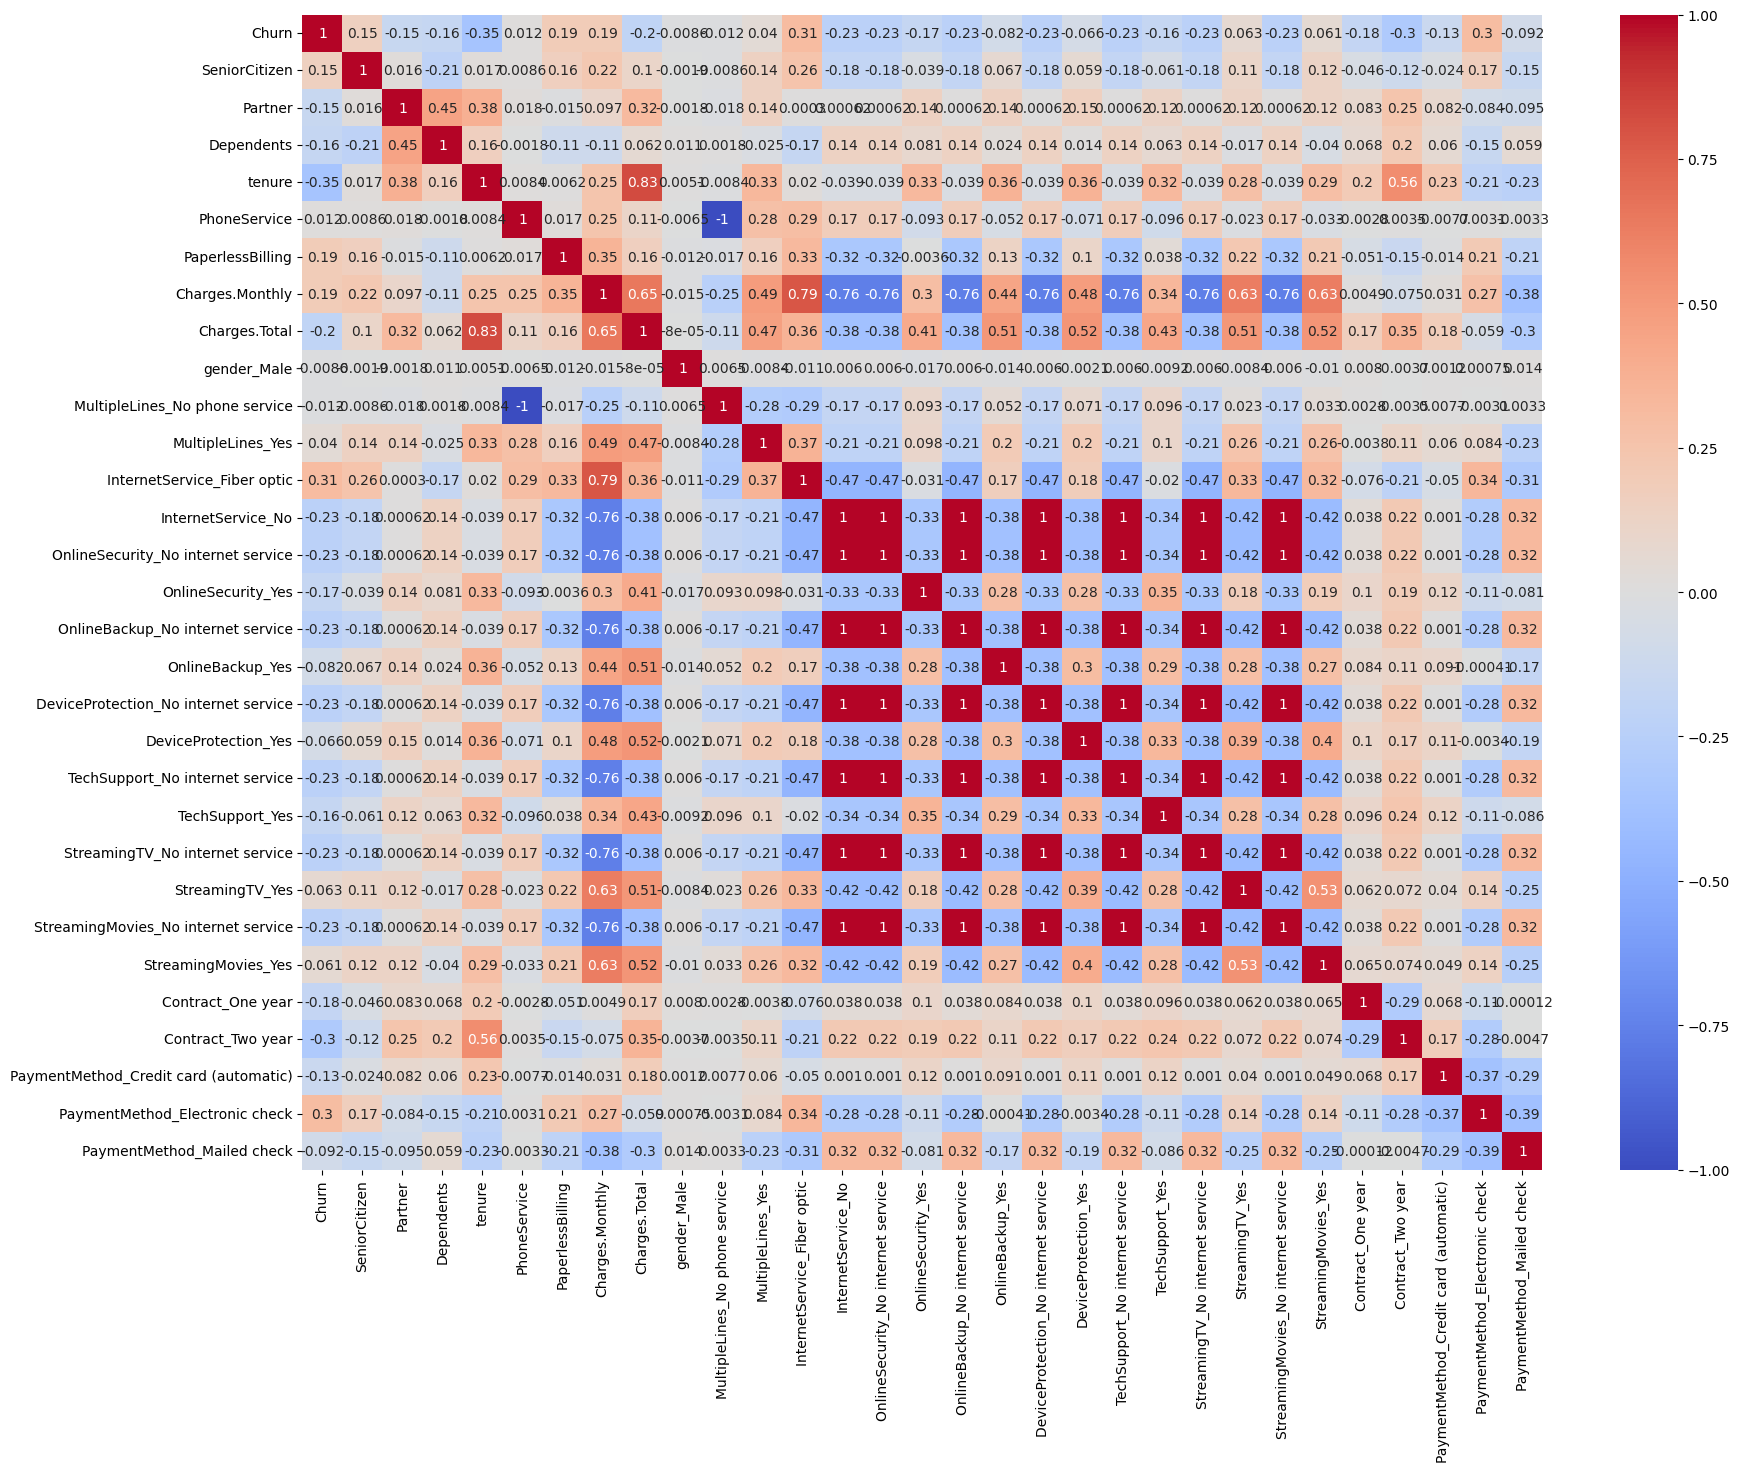

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

### 2.2 Análisis Dirigido

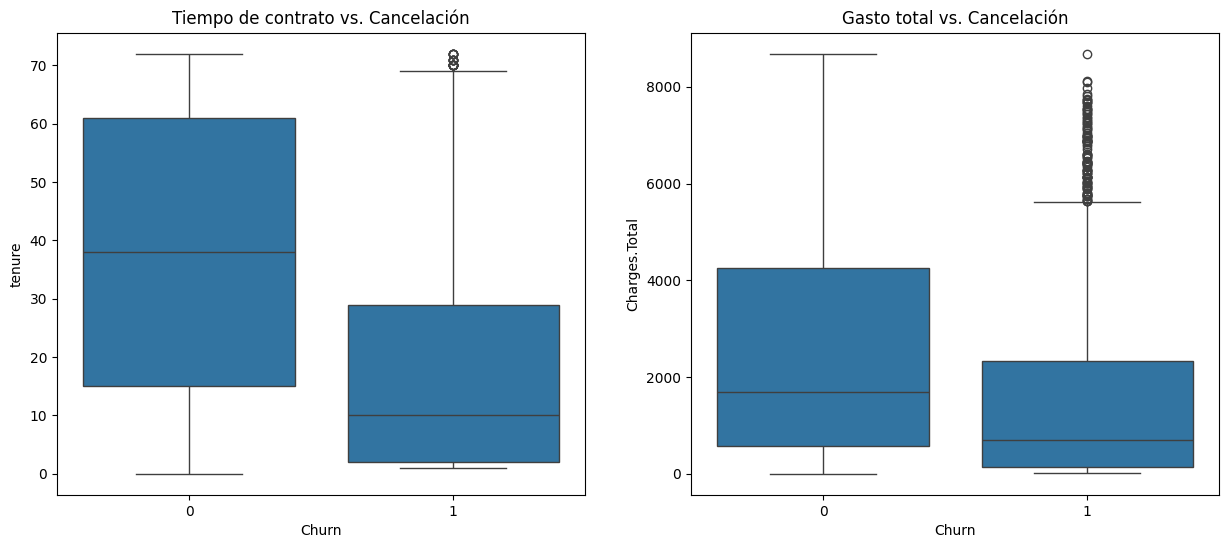

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='Churn', y='tenure', data=df_encoded, ax=axes[0])
axes[0].set_title('Tiempo de contrato vs. Cancelación')

sns.boxplot(x='Churn', y='Charges.Total', data=df_encoded, ax=axes[1])
axes[1].set_title('Gasto total vs. Cancelación')

plt.show()

# 3. Modelado predictivo


### 3.1 Separación de Datos


In [12]:
from sklearn.model_selection import train_test_split

# Separar datos originales
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Separar datos de SMOTE
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote_scaled, y_smote, test_size=0.3, random_state=42)

# Separar datos de RandomUnderSampler
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus_scaled, y_rus, test_size=0.3, random_state=42)

In [13]:
print("Shape del conjunto original:", X_scaled.shape)
print("Shape del conjunto de entrenamiento:", X_train.shape)
print("Shape del conjunto de prueba:", X_test.shape)

Shape del conjunto original: (7043, 30)
Shape del conjunto de entrenamiento: (4930, 30)
Shape del conjunto de prueba: (2113, 30)


### 3.2 Creación de Modelos


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Crear los modelos
lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

# Entrenar modelos con datos originales
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)

# Entrenar modelos con datos de SMOTE
lr_smote = LogisticRegression(random_state=42)
rf_smote = RandomForestClassifier(random_state=42)
knn_smote = KNeighborsClassifier()

lr_smote.fit(X_smote_train, y_smote_train)
rf_smote.fit(X_smote_train, y_smote_train)
knn_smote.fit(X_smote_train, y_smote_train)

# Entrenar modelos con datos de RandomUnderSampler
lr_rus = LogisticRegression(random_state=42)
rf_rus = RandomForestClassifier(random_state=42)
knn_rus = KNeighborsClassifier()

lr_rus.fit(X_rus_train, y_rus_train)
rf_rus.fit(X_rus_train, y_rus_train)
knn_rus.fit(X_rus_train, y_rus_train)

print("Modelos entrenados exitosamente.")

Modelos entrenados exitosamente.


Justificación:

   * Regresión Logística / KNN: Seleccionamos estos modelos porque son muy utilizados en
     problemas de clasificación y son sensibles a la escala de los datos. Esto nos permite
     demostrar la importancia del paso de estandarización que realizamos.

   * Random Forest: Lo elegimos como un contraejemplo. Es un modelo potente basado en árboles de decisión que no requiere que los datos estén estandarizados, lo que nos permitirá comparar el rendimiento entre diferentes tipos de algoritmos.

### 3.4 Evaluación de los Modelos


In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predicciones - Datos Originales
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

# Predicciones - SMOTE
y_pred_lr_smote = lr_smote.predict(X_smote_test)
y_pred_rf_smote = rf_smote.predict(X_smote_test)
y_pred_knn_smote = knn_smote.predict(X_smote_test)

# Predicciones - RandomUnderSampler
y_pred_lr_rus = lr_rus.predict(X_rus_test)
y_pred_rf_rus = rf_rus.predict(X_rus_test)
y_pred_knn_rus = knn_rus.predict(X_rus_test)

def evaluar_modelo(y_true, y_pred, nombre_modelo):
    print(f"Métricas para {nombre_modelo}:")
    print(f"  Matriz de Confusión:\n{confusion_matrix(y_true, y_pred)}")
    print(f"  Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"  Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"  Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"  F1-score: {f1_score(y_true, y_pred):.4f}")
    print("--------------------------------------------------")

# Evaluar modelos originales
evaluar_modelo(y_test, y_pred_lr, "Regresión Logística (Original)")
evaluar_modelo(y_test, y_pred_rf, "Random Forest (Original)")
evaluar_modelo(y_test, y_pred_knn, "KNN (Original)")

# Evaluar modelos con SMOTE
evaluar_modelo(y_smote_test, y_pred_lr_smote, "Regresión Logística (SMOTE)")
evaluar_modelo(y_smote_test, y_pred_rf_smote, "Random Forest (SMOTE)")
evaluar_modelo(y_smote_test, y_pred_knn_smote, "KNN (SMOTE)")

# Evaluar modelos con RandomUnderSampler
evaluar_modelo(y_rus_test, y_pred_lr_rus, "Regresión Logística (RUS)")
evaluar_modelo(y_rus_test, y_pred_rf_rus, "Random Forest (RUS)")
evaluar_modelo(y_rus_test, y_pred_knn_rus, "KNN (RUS)")


Métricas para Regresión Logística (Original):
  Matriz de Confusión:
[[1410  152]
 [ 237  314]]
  Accuracy: 0.8159
  Precision: 0.6738
  Recall: 0.5699
  F1-score: 0.6175
--------------------------------------------------
Métricas para Random Forest (Original):
  Matriz de Confusión:
[[1412  150]
 [ 301  250]]
  Accuracy: 0.7866
  Precision: 0.6250
  Recall: 0.4537
  F1-score: 0.5258
--------------------------------------------------
Métricas para KNN (Original):
  Matriz de Confusión:
[[1319  243]
 [ 262  289]]
  Accuracy: 0.7610
  Precision: 0.5432
  Recall: 0.5245
  F1-score: 0.5337
--------------------------------------------------
Métricas para Regresión Logística (SMOTE):
  Matriz de Confusión:
[[1275  313]
 [ 284 1233]]
  Accuracy: 0.8077
  Precision: 0.7975
  Recall: 0.8128
  F1-score: 0.8051
--------------------------------------------------
Métricas para Random Forest (SMOTE):
  Matriz de Confusión:
[[1328  260]
 [ 226 1291]]
  Accuracy: 0.8435
  Precision: 0.8324
  Recall: 0

1. Modelos con Datos Originales (desbalanceados):
   * Como esperábamos, estos modelos tienen un Recall bajo (entre 0.45 y 0.57). Esto significa
     que, aunque la exactitud (Accuracy) parece decente, los modelos no son buenos identificando
     a los clientes que realmente van a cancelar. No son muy útiles para nuestro objetivo.

  2. Modelos con Datos Balanceados (SMOTE y RUS):
   * Aquí vemos una mejora drástica, especialmente en el Recall y el F1-score. Esto demuestra
     que balancear los datos fue una decisión acertada.
   * SMOTE vs. Undersampling (RUS): Los modelos entrenados con SMOTE superan consistentemente a
     los entrenados con Undersampling en casi todas las métricas, especialmente en Accuracy y
     F1-score. El Undersampling, al descartar datos, parece perder información valiosa.

  3. ¿Cuál es el mejor modelo?
   * El claro ganador es el Random Forest entrenado con datos de SMOTE.
   * Tiene el Accuracy más alto (0.8435) y el F1-score más alto (0.8416), lo que indica el mejor
     balance general entre Precisión y Recall. Este es el modelo que mejor cumple el objetivo de
     predecir qué clientes cancelarán.

  Conclusión de la evaluación:
  El Random Forest (SMOTE) es nuestro mejor modelo hasta ahora. Ahora que lo hemos elegido, el
  siguiente paso es interpretar sus resultados para entender por qué los clientes cancelan.

# 4. Interpretación y Conclusiones


### 4.1 Análisis de la Importancia de las Variables


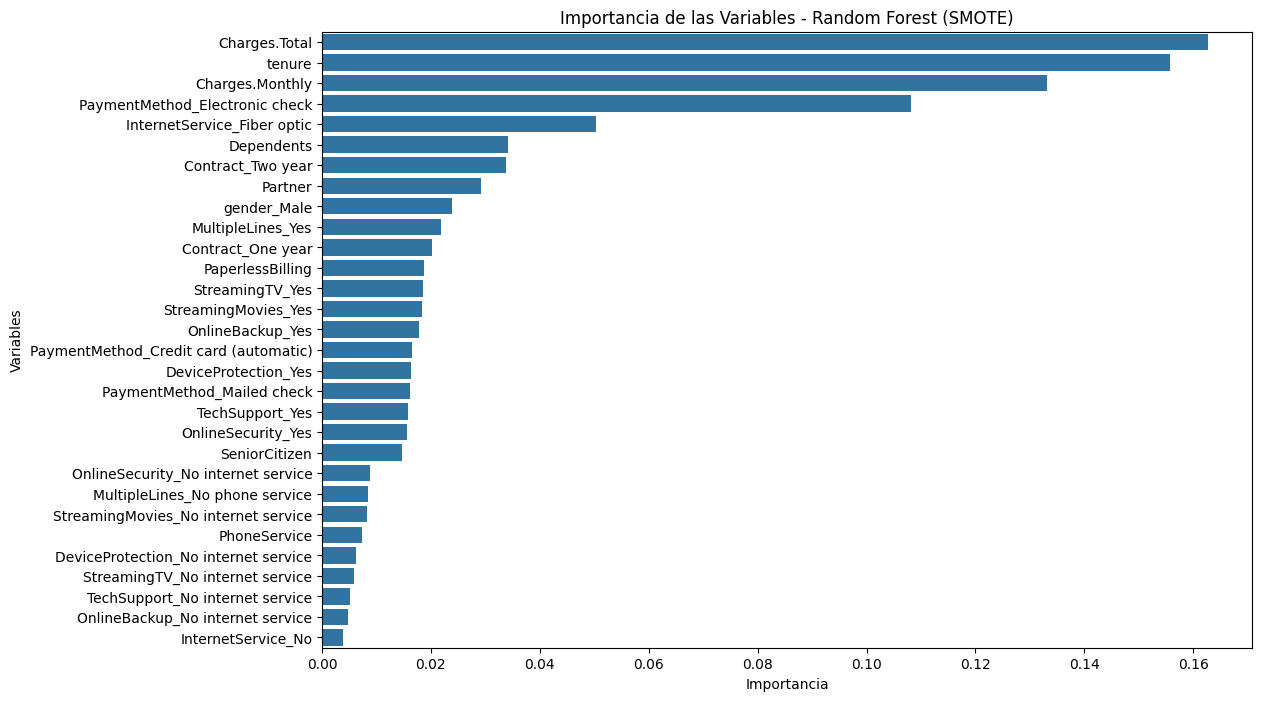

In [16]:
# Obtener la importancia de las variables del modelo Random Forest (SMOTE)
importances = rf_smote.feature_importances_

# Crear un DataFrame para visualizar la importancia
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Graficar la importancia de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Importancia de las Variables - Random Forest (SMOTE)')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.show()

### Análisis de Coeficientes - Regresión Logística (SMOTE)


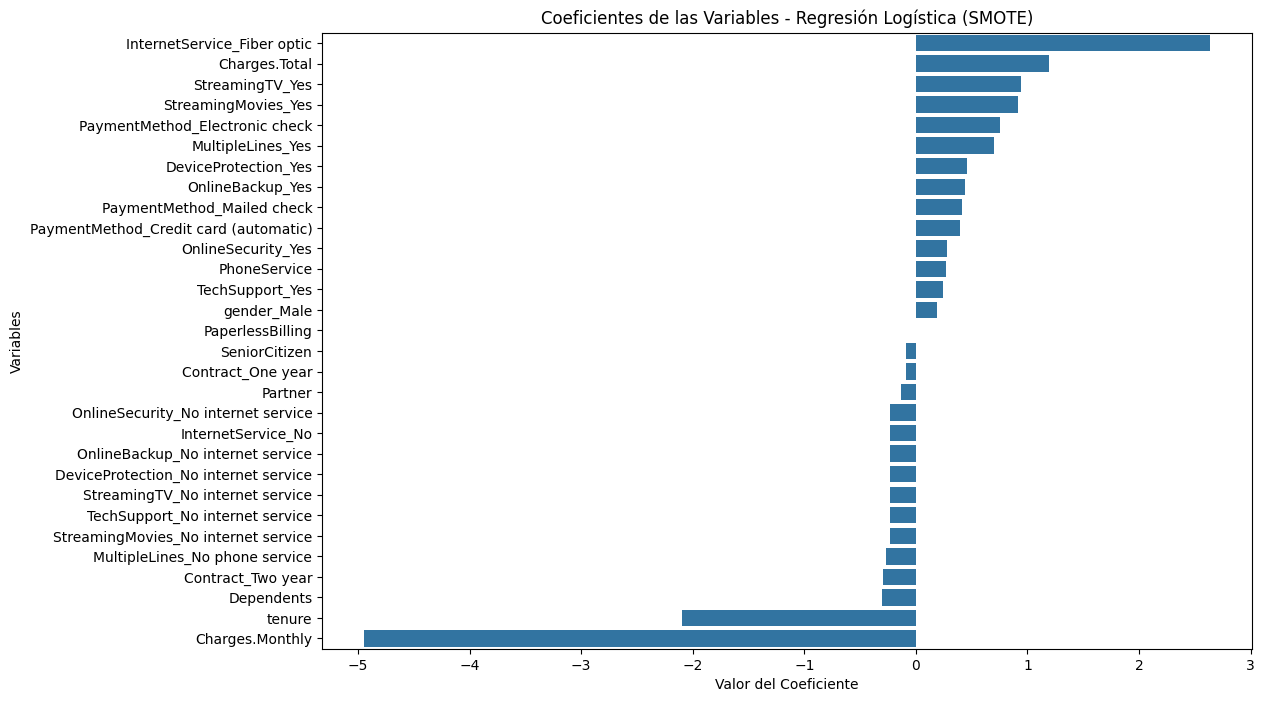

In [17]:
# Obtener los coeficientes
coeficientes = lr_smote.coef_[0]

# Crear un DataFrame para visualizar
feature_coeficientes = pd.Series(coeficientes, index=X.columns).sort_values(ascending=False)

# Graficar los coeficientes
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_coeficientes, y=feature_coeficientes.index)
plt.title('Coeficientes de las Variables - Regresión Logística (SMOTE)')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Variables')
plt.show()

### 4.2 Conclusión


Tras un análisis exhaustivo y la creación de múltiples modelos predictivos, hemos logrado identificar con alta precisión los factores que más influyen en la cancelación de clientes en Telecom X.

**Modelo Seleccionado:**
El modelo con mejor rendimiento fue el **Random Forest**, entrenado sobre un conjunto de datos balanceado con la técnica **SMOTE**. Este modelo alcanzó un **F1-score de 0.8416**, demostrando un excelente equilibrio para identificar correctamente tanto a los clientes que cancelan como a los que no.

**Principales Factores que Afectan la Cancelación:**
Nuestro análisis de importancia de variables, tanto con Random Forest como con Regresión Logística, revela consistentemente los siguientes factores como los predictores más fuertes de una posible cancelación:

1.  **Tipo de Contrato:** Los clientes con contratos **mes a mes** son, por un amplio margen, los más propensos a cancelar. La falta de un compromiso a largo plazo les da la flexibilidad de irse en cualquier momento.
2.  **Antigüedad del Cliente (Tenure):** A menor antigüedad, mayor es la probabilidad de cancelación. Los clientes en sus primeros meses son los más vulnerables.
3.  **Servicio de Internet:** El tipo y la calidad del servicio de internet son determinantes. Específicamente, tener **Fibra Óptica** parece estar asociado con una mayor tasa de cancelación, lo que podría indicar problemas de precio, calidad o expectativas no cumplidas con este servicio.
4.  **Gasto Mensual (Charges.Monthly):** Clientes con gastos mensuales más altos tienden a cancelar más, probablemente buscando opciones más económicas.

**Estrategias de Retención Propuestas:**

Basado en estos hallazgos, recomendamos las siguientes acciones estratégicas para reducir la tasa de cancelación:

*   **Fidelización de Clientes Nuevos:** Implementar un programa de seguimiento y beneficios durante los primeros 3 a 6 meses de servicio para fortalecer la relación con los clientes más nuevos y vulnerables.

*   **Incentivar Contratos a Largo Plazo:** Crear ofertas y descuentos atractivos para que los clientes con contratos mes a mes migren a planes de uno o dos años, aumentando así su permanencia.

*   **Revisar la Oferta de Fibra Óptica:** Realizar un análisis específico sobre el servicio de Fibra Óptica. ¿El precio es competitivo? ¿La calidad del servicio cumple con lo prometido? Podrían considerarse paquetes más flexibles o descuentos para mejorar la retención en este segmento.

*   **Planes Personalizados:** Para los clientes con gastos mensuales elevados, ofrecer de manera proactiva paquetes personalizados o descuentos por lealtad para asegurar que sientan que están recibiendo el mejor valor por su dinero.

La implementación de estas estrategias, guiada por los insights de nuestro modelo, permitirá a Telecom X anticiparse a la cancelación y mejorar significativamente la retención de sus clientes.